# ZOMATO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df1=pd.read_csv('CountryCode.csv')

In [3]:
df2=pd.read_csv('zomato')

In [4]:
df1.head(3)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil


In [5]:
df2.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [6]:
df2['Country Code'].nunique()

15

In [7]:
df1.shape

(15, 2)

In [8]:
df=pd.merge(df1,df2,on='Country Code')

In [9]:
df.head(3)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [11]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
# There is 9 null values in cuisines. We can fill them with mode or drop them.

In [13]:
df=df.dropna(axis=1)

In [14]:
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
# Removing unwanted columns
df.drop(['Restaurant ID', 'Address', 'Locality Verbose', 'Longitude', 'Latitude','Switch to order menu' ],
        axis=1, inplace=True)


In [16]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)


In [17]:
print('categorical columns are:',cat)
print('numerical columns are:',num)

categorical columns are: ['Country', 'Restaurant Name', 'City', 'Locality', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text']
numerical columns are: ['Country Code', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [18]:
for i in cat:
    print(i)
    print(df[i].value_counts())
    print('=='*50)

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64
Restaurant Name
Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
                                      ..
Chor Bizarre - Hotel Broadway          1
Thugs - Hotel Broadway                 1
The Kylin Experience - Holiday Inn     1
Cafe on 3 - Holiday Inn                1
Fishpatrick's Crabby Cafe              1
Name: Restaurant Name, Length: 7446, dtype: int64
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            2

In [19]:
for i in num:
    print(i)
    print(df[i].value_counts())
    print('=='*50)

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64
Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
70000       1
165000      1
450000      1
120000      1
4300        1
Name: Average Cost for two, Length: 140, dtype: int64
Price range
1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64
Votes
0    

In [20]:
# Checking outliers

<Axes: >

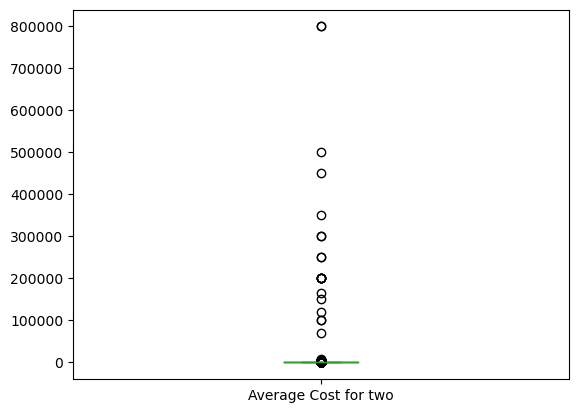

In [21]:
df['Average Cost for two'].plot.box()

<Axes: >

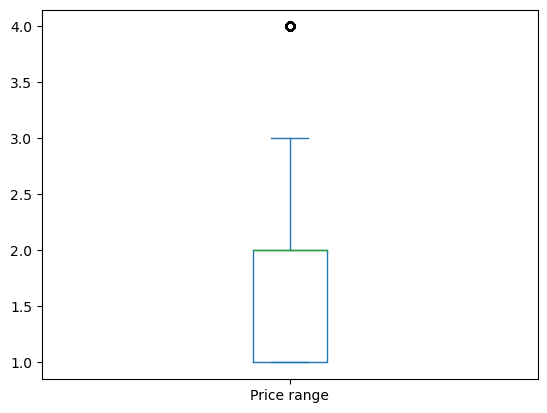

In [22]:
df['Price range'].plot.box()

<Axes: >

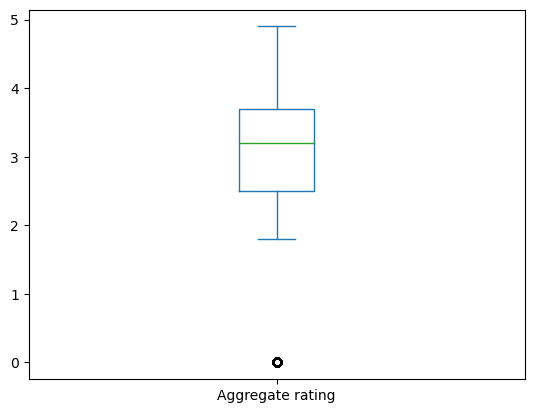

In [23]:
df['Aggregate rating'].plot.box()

<Axes: >

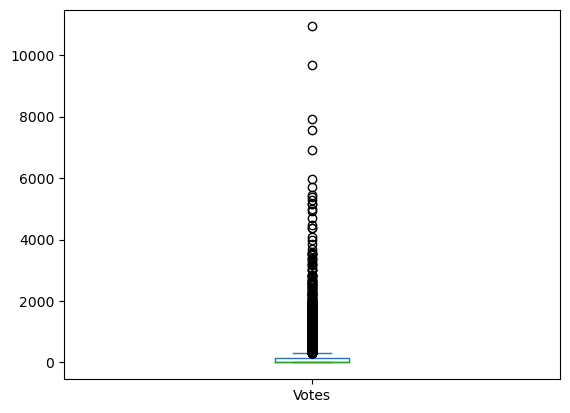

In [24]:
df['Votes'].plot.box()

In [25]:
# checking skewness

In [26]:
df.skew()

Country Code             3.043965
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

In [27]:
# Visualisation

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

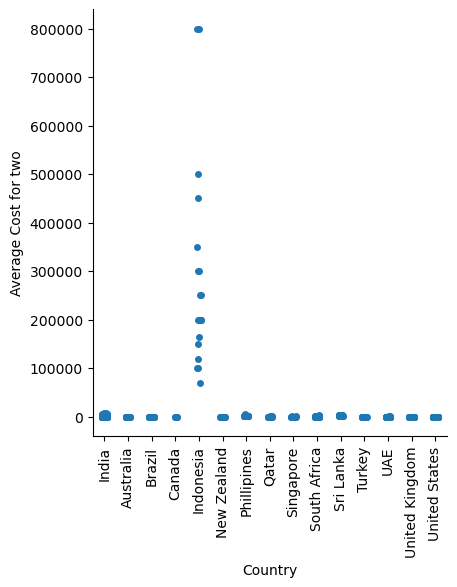

In [28]:
sns.catplot(x='Country',y='Average Cost for two',data=df)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

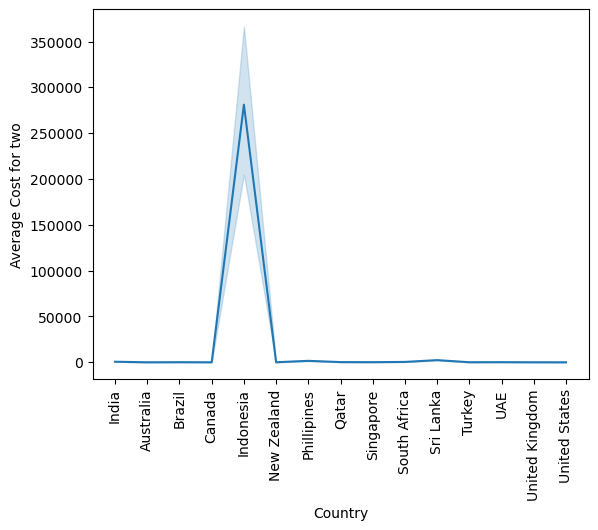

In [29]:
sns.lineplot(x='Country',y='Average Cost for two',data=df)
plt.xticks(rotation='vertical')

<Axes: xlabel='Average Cost for two', ylabel='Density'>

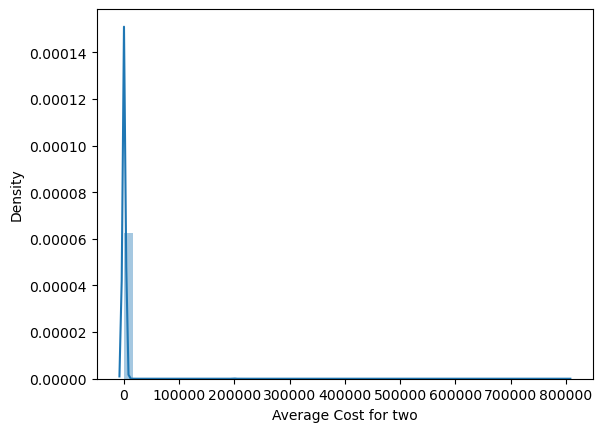

In [30]:
sns.distplot(df['Average Cost for two'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

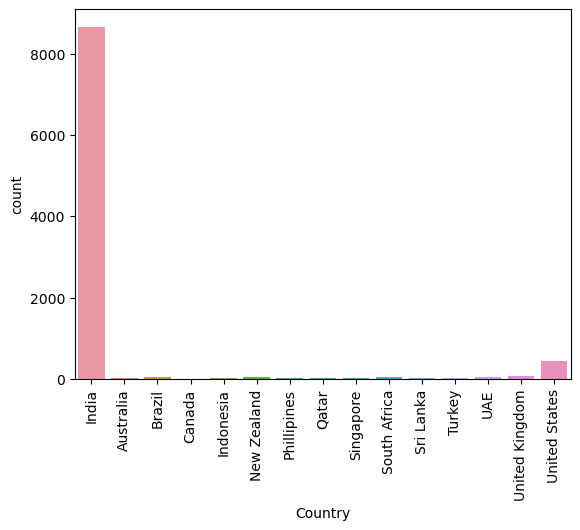

In [31]:
sns.countplot(x='Country',data=df)
plt.xticks(rotation='vertical')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139]),
 [Text(0, 0, '0'),
  Text(1, 0, '7'),
  Text(2, 0, '10'),
  Text(3, 0, '15'),
  Text(4, 0, '20'),
  Text(5, 0, '25'),
  Text(6, 0, '30'),
  Text(7, 0, '35'),
  Text(8, 0, '40'),
  Text(9, 0, '45'),
  Text(10, 0

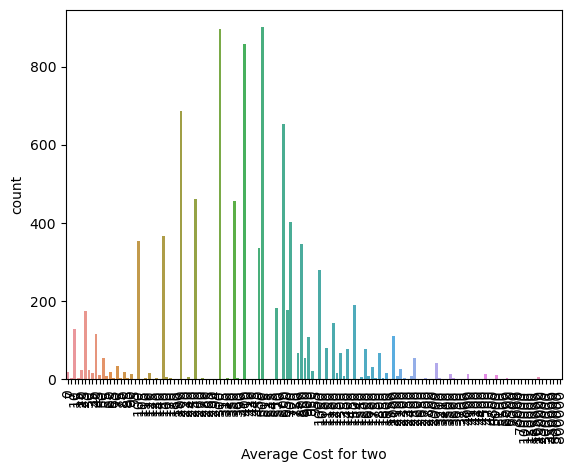

In [32]:
sns.countplot(x='Average Cost for two',data=df)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Very Good'),
  Text(2, 0, 'Average'),
  Text(3, 0, 'Excellent'),
  Text(4, 0, 'Not rated'),
  Text(5, 0, 'Poor')])

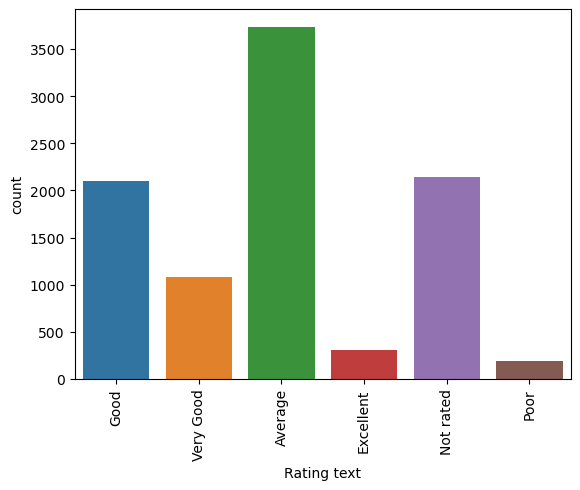

In [33]:
sns.countplot(x='Rating text',data=df)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.8'),
  Text(2, 0, '1.9'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.1'),
  Text(5, 0, '2.2'),
  Text(6, 0, '2.3'),
  Text(7, 0, '2.4'),
  Text(8, 0, '2.5'),
  Text(9, 0, '2.6'),
  Text(10, 0, '2.7'),
  Text(11, 0, '2.8'),
  Text(12, 0, '2.9'),
  Text(13, 0, '3.0'),
  Text(14, 0, '3.1'),
  Text(15, 0, '3.2'),
  Text(16, 0, '3.3'),
  Text(17, 0, '3.4'),
  Text(18, 0, '3.5'),
  Text(19, 0, '3.6'),
  Text(20, 0, '3.7'),
  Text(21, 0, '3.8'),
  Text(22, 0, '3.9'),
  Text(23, 0, '4.0'),
  Text(24, 0, '4.1'),
  Text(25, 0, '4.2'),
  Text(26, 0, '4.3'),
  Text(27, 0, '4.4'),
  Text(28, 0, '4.5'),
  Text(29, 0, '4.6'),
  Text(30, 0, '4.7'),
  Text(31, 0, '4.8'),
  Text(32, 0, '4.9')])

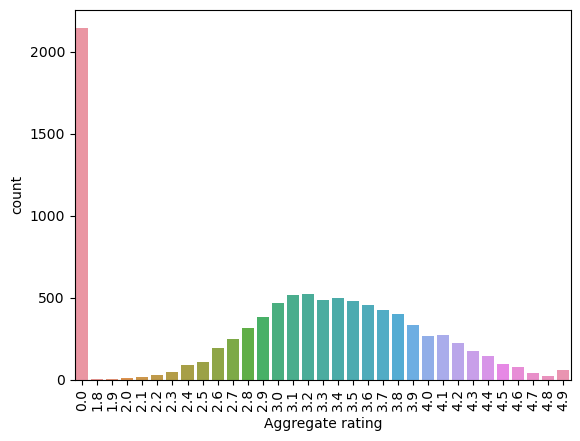

In [34]:
sns.countplot(x='Aggregate rating',data=df)
plt.xticks(rotation='vertical')

In [37]:
# This dataset has maximum restaurants from India.
# Mostly cost for two varies under 1000 in Indian Currency.
# Maximum rating text recieved as 'average'.
# Aggregating rating varies 3 to 4 in majority.

In [38]:
group=df.groupby('Country')['Average Cost for two'].mean()
grouped=group.sort_values(ascending=False)
grouped

Country
Indonesia         281190.476190
Sri Lanka           2375.000000
Phillipines         1606.818182
India                623.370319
South Africa         419.733333
Qatar                223.750000
UAE                  166.416667
Singapore            155.750000
Brazil               134.666667
Turkey                84.852941
New Zealand           69.750000
United Kingdom        47.812500
Canada                36.250000
United States         26.152074
Australia             24.083333
Name: Average Cost for two, dtype: float64

In [39]:
group2=df.groupby('City')['Average Cost for two'].mean()
grouped2=group2.sort_values(ascending=False)
grouped2

City
Jakarta           308437.500000
Tangerang         250000.000000
Bogor             160000.000000
Bandung           150000.000000
Pasay City          3333.333333
                      ...      
Mc Millan             10.000000
Inverloch              7.000000
Lakes Entrance         7.000000
Dicky Beach            7.000000
Miller                 0.000000
Name: Average Cost for two, Length: 141, dtype: float64

In [40]:
group3=df.groupby('Has Table booking')['Average Cost for two'].mean()
grouped3=group3.sort_values(ascending=False)
grouped3

Has Table booking
Yes    1535.898100
No     1152.757298
Name: Average Cost for two, dtype: float64

In [41]:
group4=df.groupby('Has Online delivery')['Average Cost for two'].mean()
grouped4=group4.sort_values(ascending=False)
grouped4

Has Online delivery
No     1378.919296
Yes     678.635251
Name: Average Cost for two, dtype: float64

In [42]:
group5=df.groupby('Has Online delivery')['Price range'].mean()
grouped5=group5.sort_values(ascending=False)
grouped5

Has Online delivery
Yes    1.924929
No     1.763380
Name: Price range, dtype: float64

In [43]:
df.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [44]:
df.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10)


Restaurant Name
Atlanta Highway Seafood Market    4.9
Bao                               4.9
Braseiro da G��vea                4.9
CakeBee                           4.9
Carnival By Tresind               4.9
Caterspoint                       4.9
Cube - Tasting Kitchen            4.9
Draft Gastro Pub                  4.9
Duck & Waffle                     4.9
Flat Iron                         4.9
Name: Aggregate rating, dtype: float64

In [45]:
# Indonesia, Sri Lanka, Phillipines and India has maximum rate for two.
# People who booked a table have paid more than who have not booked.
# most of restaurant dont do online delivery.


In [46]:
# Removing outliers

In [47]:
z=np.abs(zscore(df[num]))

In [48]:
df1 = df[(z < 3).all(axis=1)]
df1.shape

(8692, 15)

In [49]:
df=df1

In [50]:
# Remoning skewness
df['Votes'] = np.log1p(df['Votes'])
df['Average Cost for two']=np.log1p(df['Average Cost for two'])

In [51]:
df.skew()

Country Code            8.892253
Average Cost for two   -0.524304
Price range             1.013469
Aggregate rating       -0.882750
Votes                  -0.059095
dtype: float64

In [52]:
# Labeling
lb = LabelEncoder()
for i in cat:
    df[i] = lb.fit_transform(df[i])


In [53]:
df.head(3)

,Country Code,Country,Restaurant Name,City,Locality,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,2876,0,13,6.746412,3,0,0,0,3,3.9,5,2,4.948760
1,1,3,4750,0,13,6.552508,3,0,0,0,2,3.5,5,2,4.276666
2,1,3,6240,0,13,6.216606,3,0,0,0,2,3.6,5,2,4.553877


In [54]:
# Splitting for first target -- 'Average price for two'

In [55]:
X = df.drop(['Average Cost for two'], axis =1)
Y = df['Average Cost for two']


In [56]:
st= StandardScaler()
X_scale = st.fit_transform(X)
X = pd.DataFrame(X_scale, columns=X.columns)
X

,Country Code,Country,Restaurant Name,City,Locality,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.121976,-0.009105,-0.211859,-3.587884,-2.005899,0.067252,-0.373878,-0.611743,-0.062666,1.455358,0.909250,1.391309,0.212137,0.974643
1,-0.121976,-0.009105,0.761246,-3.587884,-2.005899,0.067252,-0.373878,-0.611743,-0.062666,0.305465,0.644522,1.391309,0.212137,0.624188
2,-0.121976,-0.009105,1.534953,-3.587884,-2.005899,0.067252,-0.373878,-0.611743,-0.062666,0.305465,0.710704,1.391309,0.212137,0.768737
3,-0.121976,-0.009105,-0.926889,-3.587884,-1.493209,0.067252,-0.373878,-0.611743,-0.062666,0.305465,0.975432,-1.455839,2.060960,0.728826
4,-0.121976,-0.009105,0.592485,-3.587884,-1.493209,0.067252,-0.373878,-0.611743,-0.062666,1.455358,1.107797,-1.455839,2.060960,1.096151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,10.321505,11.297270,-0.266382,1.764194,0.105176,-3.728549,-0.373878,-0.611743,-0.062666,2.605252,0.445975,-0.744052,-1.020412,0.217384
8688,10.321505,11.297270,1.181333,1.764194,0.531699,-3.728549,-0.373878,-0.611743,-0.062666,2.605252,0.445975,-0.744052,-1.020412,0.184784
8689,10.321505,11.297270,-1.486659,1.764194,1.199489,-3.728549,-0.373878,-0.611743,-0.062666,1.455358,0.843068,1.391309,0.212137,0.150009
8690,10.321505,11.297270,-1.289857,1.764194,1.281347,-3.728549,-0.373878,-0.611743,-0.062666,1.455358,0.909250,1.391309,0.212137,0.262755


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
LR = LinearRegression()
RD = Ridge()
LS = Lasso()
DTC = DecisionTreeRegressor()
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor()
GB = GradientBoostingRegressor()
ADA= AdaBoostRegressor()



models = [LR,RD,LS,DTC,KNR,RFR,GB,ADA]

In [61]:
# Checking best random state
max_accu=0
max_rs=0
for i in range(1,100):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.3, random_state=i)
    LR=LinearRegression()
    LR.fit(Xtrain,Ytrain)
    ypred=LR.predict(Xtest)
    acc=r2_score(Ytest,ypred)
    if acc>max_accu:
        max_accu=acc
        maxrs=i
print('Best accuracy:', max_accu ,'best Random_state:', maxrs)

Best accuracy: 0.7947337725652172 best Random_state: 24


In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3,random_state=24)
for i in models:
    i.fit(xtrain,ytrain)
    pred=i.predict(xtest)
    print(i)
    print(mean_absolute_error(pred,ytest))
    print(r2_score(pred,ytest))
    print('=='*50)

LinearRegression()
0.2637248046630842
0.7343337722244033
Ridge()
0.26372460037285667
0.7341896952751439
Lasso()
0.5908666589456866
-1.9419688674282158e+29
DecisionTreeRegressor()
0.31198717029422024
0.6473940438867694
KNeighborsRegressor()
0.2749982029594731
0.7273374392121594
RandomForestRegressor()
0.24050937594804458
0.7847417029833067
GradientBoostingRegressor()
0.24366395166060942
0.7738651226554306
AdaBoostRegressor()
0.3234939386461084
0.5494574076546279


In [64]:
# Random forest and Gradient boosting has more accuracy than others.

In [65]:
# Second target -- 'Price range'
x = df1.drop(['Price range'], axis =1)
y = df1['Price range']

In [66]:
y.value_counts()

1    4298
2    2855
3    1089
4     450
Name: Price range, dtype: int64

In [67]:
sm=SMOTE()

x,y=sm.fit_resample(x,y)
y.value_counts()

3    4298
2    4298
4    4298
1    4298
Name: Price range, dtype: int64

In [68]:
x_scale = st.fit_transform(x)
x = pd.DataFrame(x_scale, columns=x.columns)
x

,Country Code,Country,Restaurant Name,City,Locality,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes
0,-0.221130,0.049313,-0.262711,-3.428197,-1.883083,0.188484,0.212067,-0.507949,-0.47538,-0.045166,0.688198,1.494107,0.192669,0.641708
1,-0.221130,0.049313,0.694695,-3.428197,-1.883083,-0.020396,0.212067,-0.507949,-0.47538,-0.045166,0.380452,1.494107,0.192669,0.267337
2,-0.221130,0.049313,1.455919,-3.428197,-1.883083,-0.382241,0.212067,-0.507949,-0.47538,-0.045166,0.457388,1.494107,0.192669,0.421749
3,-0.221130,0.049313,-0.966205,-3.428197,-1.389163,-0.622081,0.212067,-0.507949,-0.47538,-0.045166,0.765135,-1.224420,2.130099,0.379115
4,-0.221130,0.049313,0.528656,-3.428197,-1.389163,0.363364,0.212067,-0.507949,-0.47538,-0.045166,0.919008,-1.224420,2.130099,0.771507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17187,-0.221130,0.049313,-0.337812,0.754646,1.350222,1.861295,0.212067,-0.507949,-0.47538,-0.045166,0.694382,-1.224420,1.484289,1.061491
17188,-0.221130,0.049313,-1.215008,-0.038651,-1.007310,1.334102,0.212067,1.968700,-0.47538,-0.045166,0.688198,1.494107,0.192669,1.056863
17189,-0.221130,0.049313,-1.419875,-1.625247,0.520105,0.869264,0.212067,-0.507949,-0.47538,-0.045166,1.155847,-1.904052,0.838479,0.782010
17190,-0.221130,0.049313,-1.149104,-1.264657,-1.223140,1.316150,0.212067,1.968700,-0.47538,-0.045166,0.502022,0.814475,-0.453141,1.587842


In [69]:

DTC = DecisionTreeClassifier()
KNC = KNeighborsClassifier()
RFC = RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC = GradientBoostingClassifier()
SGD=SGDClassifier()
ABC=AdaBoostClassifier()


model = [DTC,KNC,RFC,GBC,ETC,ABC,SGD]

In [70]:
# Checking best random state
max_accu=0
max_rs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    y_pred=DTC.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    if acc>max_accu:
        max_accu=acc
        maxrs=i
print('Best accuracy:', max_accu ,'best Random_state:', maxrs)

Best accuracy: 0.9732454439705313 best Random_state: 95


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=25)
for i in model:
    i.fit(x_train,y_train)
    Ypred=i.predict(x_test)
    print(i)
    print(accuracy_score(Ypred,y_test))
    print(classification_report(Ypred,y_test))
    print(confusion_matrix(Ypred,y_test))

DecisionTreeClassifier()
0.9651027530050407
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1352
           2       0.97      0.97      0.97      1293
           3       0.93      0.95      0.94      1237
           4       0.96      0.95      0.96      1276

    accuracy                           0.97      5158
   macro avg       0.96      0.96      0.96      5158
weighted avg       0.97      0.97      0.97      5158

[[1342   10    0    0]
 [   7 1256   27    3]
 [   0   24 1169   44]
 [   0    1   64 1211]]
KNeighborsClassifier()
0.8631252423419931
              precision    recall  f1-score   support

           1       0.89      0.94      0.91      1288
           2       0.83      0.81      0.82      1333
           3       0.80      0.82      0.81      1216
           4       0.93      0.88      0.91      1321

    accuracy                           0.86      5158
   macro avg       0.86      0.86      0.86      5158
weight

In [72]:
# Random forest has more accuracy than others.